<a href="https://colab.research.google.com/github/joelmirj/bibliometric-analysis/blob/main/bibliometric_rsl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

In [5]:
# data import
file_name = 'analise_dados (2).xlsx'
df = pd.read_excel(file_name)
# print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('produtos', 65), ('previsão', 53), ('dados', 52), ('demanda', 49), ('vendas', 36), ('modelo', 36), ('prever', 32), ('novos', 32), ('artigo', 19), ('autores', 16), ('precisão', 16), ('previsões', 16), ('métodos', 15), ('modelos', 15), ('produto', 15), ('solução', 12), ('análise', 12), ('método', 12), ('estudo', 11), ('sistema', 11)]


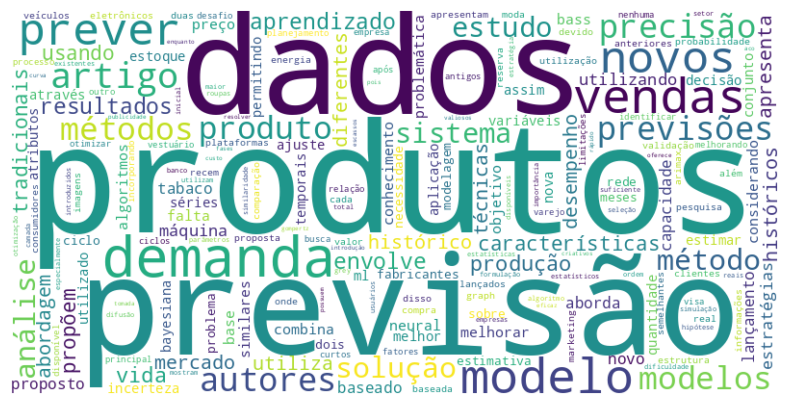

In [3]:
# summaries world cloud
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter

# Baixar stopwords do NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Função para processar o texto
def process_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remover pontuações e números
    tokens = [word for word in tokens if word not in stop_words]  # Remover stopwords
    return tokens

# Processar os resumos
all_tokens = []
for resumo in df['resumo']:
    tokens = process_text(resumo)
    all_tokens.extend(tokens)

# Contar a frequência das palavras
word_freq = Counter(all_tokens)

# Exibir as palavras mais comuns
print(word_freq.most_common(20))

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


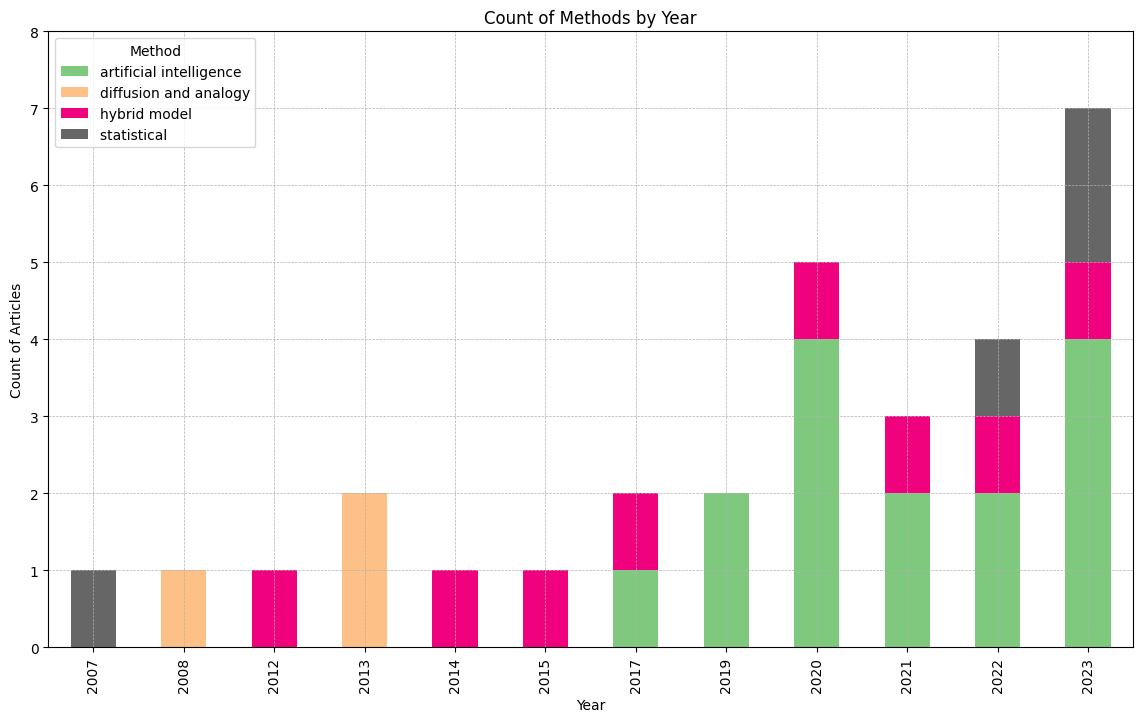

In [6]:

method_count_per_year = df.groupby(['year', 'method']).size().unstack(fill_value=0)

# Plotar o gráfico conforme solicitado
plt.figure(figsize=(14, 8))
method_count_per_year.plot(kind='bar', stacked=True, colormap='Accent', ax=plt.gca())
plt.title('Count of Methods by Year')
plt.xlabel('Year')
plt.ylabel('Count of Articles')
plt.legend(title='Method')
plt.ylim(0, 8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


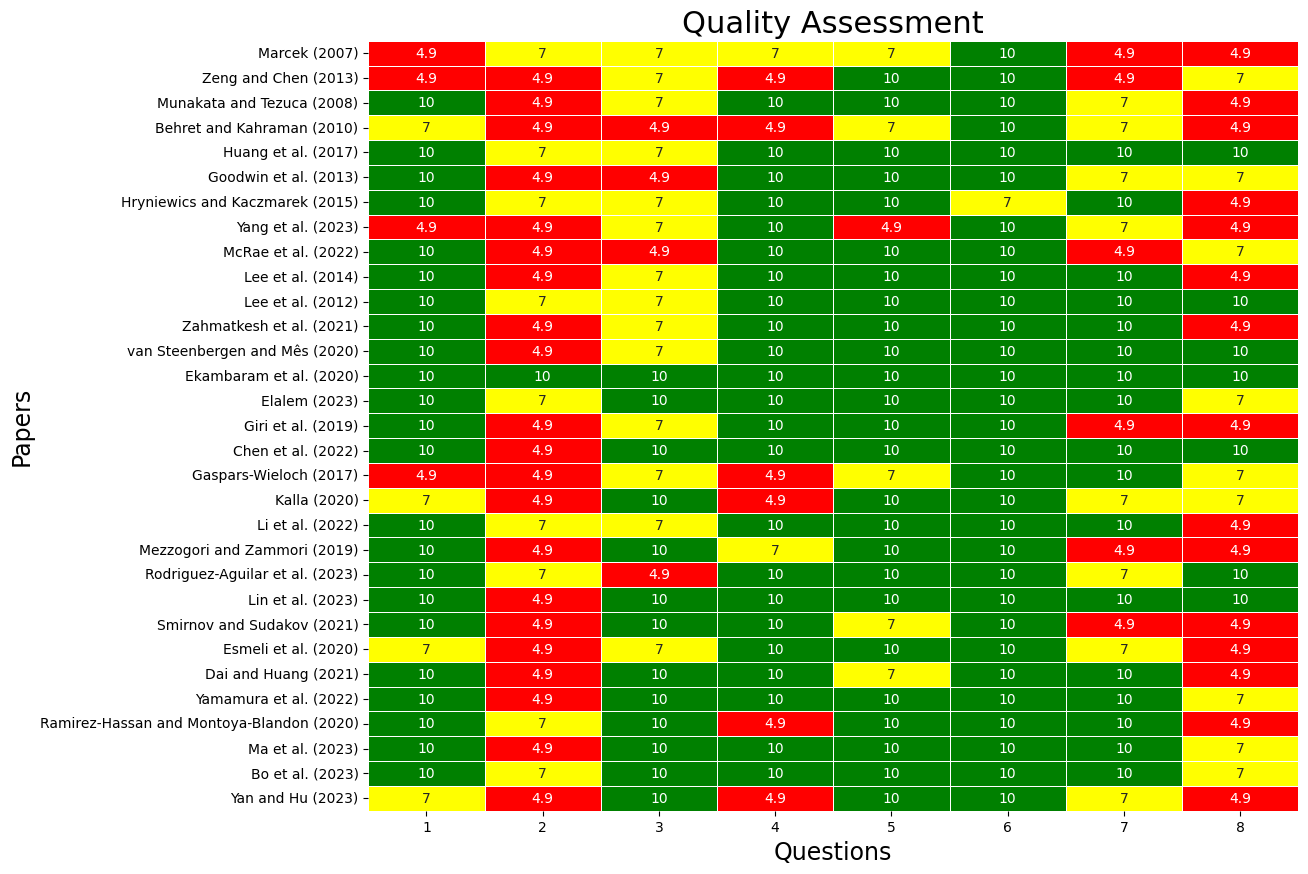

In [14]:

# Criar o DataFrame com os dados fornecidos
data = {
    'reference': [
        'Marcek (2007)', 'Zeng and Chen (2013)', 'Munakata and Tezuca (2008)', 'Behret and Kahraman (2010)', 'Huang et al. (2017)',
        'Goodwin et al. (2013)', 'Hryniewics and Kaczmarek (2015)', 'Yang et al. (2023)', 'McRae et al. (2022)', 'Lee et al. (2014)',
        'Lee et al. (2012)', 'Zahmatkesh et al. (2021)', 'van Steenbergen and Mês (2020)', 'Ekambaram et al. (2020)', 'Elalem (2023)',
        'Giri et al. (2019)', 'Chen et al. (2022)', 'Gaspars-Wieloch (2017)', 'Kalla (2020)', 'Li et al. (2022)',
        'Mezzogori and Zammori (2019)', 'Rodriguez-Aguilar et al. (2023)', 'Lin et al. (2023)', 'Smirnov and Sudakov (2021)',
        'Esmeli et al. (2020)', 'Dai and Huang (2021)', 'Yamamura et al. (2022)', 'Ramirez-Hassan and Montoya-Blandon (2020)',
        'Biswal (2019)', 'Ma et al. (2023)', 'Bo et al. (2023)', 'Yan and Hu (2023)'
    ],
    1: ['não', 'não', 'sim', 'médio', 'sim', 'sim', 'sim', 'não', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'não', 'médio', 'sim', 'sim', 'sim', 'sim', 'Sim', 'médio', 'sim', 'sim', 'sim', 'não', 'sim', 'sim', 'médio'],
    2: ['médio', 'não', 'não', 'Não', 'médio', 'não', 'médio', 'não', 'não', 'não', 'médio', 'não', 'não', 'sim', 'médio', 'não', 'não', 'não', 'não', 'médio', 'não', 'médio', 'não', 'não', 'não', 'não', 'não', 'médio', 'não', 'não', 'médio', 'não'],
    3: ['médio', 'médio', 'médio', 'não', 'médio', 'não', 'médio', 'médio', 'não', 'médio', 'médio', 'médio', 'médio', 'sim', 'sim', 'médio', 'sim', 'média', 'sim', 'médio', 'sim', 'não', 'sim', 'sim', 'médio', 'sim', 'sim', 'sim', 'médio', 'sim', 'sim', 'sim'],
    4: ['médio', 'não', 'sim', 'não', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'não', 'não', 'sim', 'médio', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'não', 'não', 'sim', 'sim', 'não'],
    5: ['médio', 'sim', 'sim', 'médio', 'sim', 'sim', 'sim', 'não', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'médio', 'sim', 'sim', 'sim', 'sim', 'sim', 'médio', 'sim', 'médio', 'sim', 'sim', 'não', 'sim', 'sim', 'sim'],
    6: ['sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'médio', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim'],
    7: ['não', 'não', 'médio', 'médio', 'sim', 'médio', 'sim', 'médio', 'não', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'não', 'sim', 'sim', 'médio', 'sim', 'não', 'médio', 'sim', 'não', 'médio', 'sim', 'sim', 'sim', 'não', 'sim', 'sim', 'médio'],
    8: ['não', 'médio', 'não', 'não', 'sim', 'médio', 'não', 'não', 'médio', 'não', 'sim', 'não', 'sim', 'sim', 'médio', 'não', 'sim', 'médio', 'médio', 'não', 'não', 'sim', 'sim', 'não', 'não', 'não', 'médio', 'não', 'não', 'médio', 'médio', 'não']
}

df = pd.DataFrame(data)

# Converter as respostas para os pesos correspondentes
peso = {'sim': 10, 'médio': 7, 'não': 4.9, 'Não': 4.9, 'Sim': 10, 'média': 7}
for col in range(1, 9):
    df[col] = df[col].map(peso)

# Filtrar artigos com pontuação total menor que 50
df['total'] = df.loc[:, 1:8].sum(axis=1)
df_filtered = df[df['total'] >= 50]

# Criar a visualização estilo "heatmap"
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered.set_index('reference').loc[:, 1:8], annot=True, cmap=['red', 'yellow', 'green'], cbar=False, linewidths=0.5)
plt.title('Quality Assessment', fontsize= 22)
plt.ylabel('Papers',fontsize=17)
plt.xlabel('Questions',fontsize=17)
plt.show()




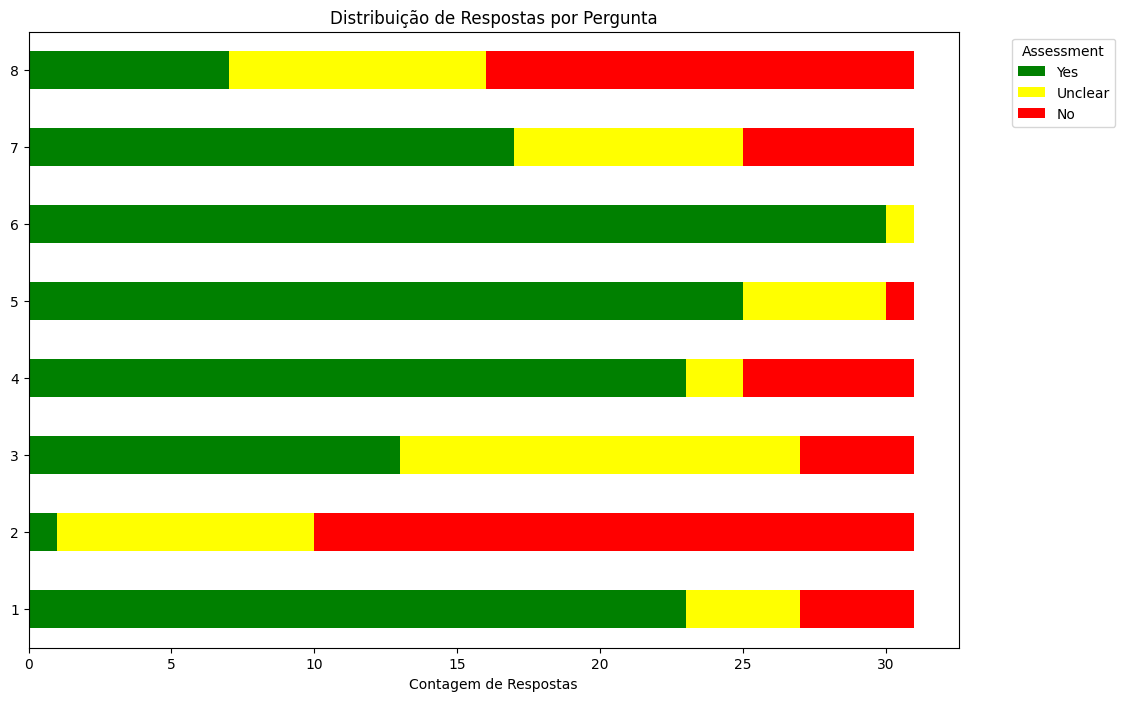

In [ ]:
# Criar a visualização de barras empilhadas para a distribuição das respostas
resumo = df_filtered.loc[:, 1:8].apply(lambda x: pd.Series([(x == 10).sum(), (x == 7).sum(), (x == 4.9).sum()], index=['Yes', 'Unclear', 'No']))
resumo = resumo.T

resumo.plot(kind='barh', stacked=True, color=['green', 'yellow', 'red'], figsize=(12, 8))
plt.xlabel('Contagem de Respostas')
plt.title('Distribuição de Respostas por Pergunta')
plt.legend(title='Assessment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

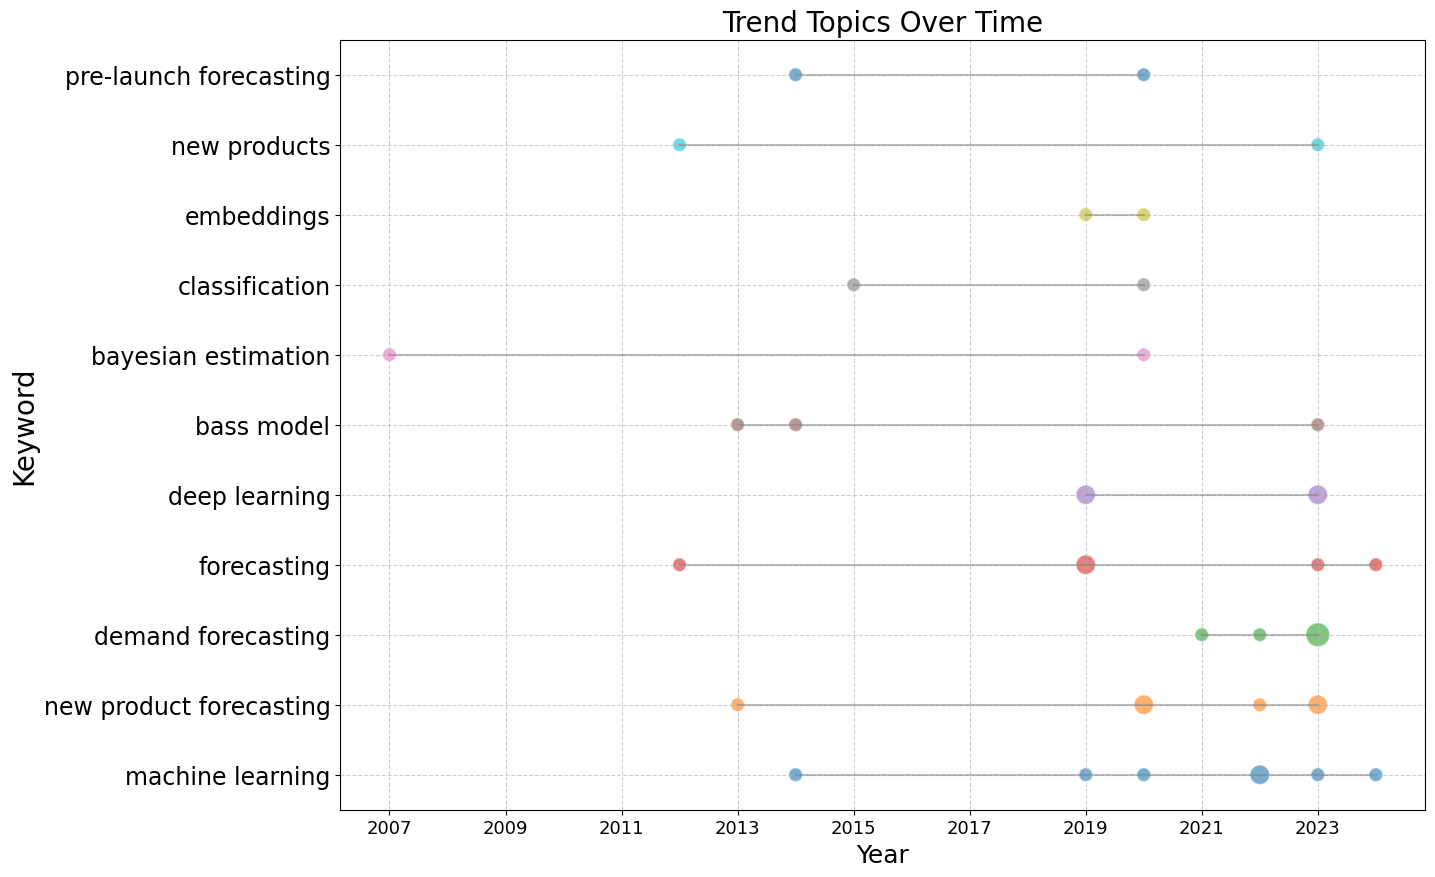

In [12]:

file_path = 'data_papers.xlsx'
df = pd.read_excel(file_path)

# Extract publication year and keywords
df_filtered = df[['PY', 'DE']].dropna()

# Split keywords and associate them with their publication year
keyword_years = df_filtered.apply(lambda row: [(row['PY'], kw.strip().lower()) for kw in row['DE'].split(';')], axis=1).explode()

# Create a DataFrame from the exploded keyword and year pairs
keyword_years_df = pd.DataFrame(keyword_years.tolist(), columns=['Year', 'Keyword'])

# Count the occurrences of each keyword per year
keyword_year_counts = keyword_years_df.groupby(['Year', 'Keyword']).size().reset_index(name='Count')

# Filter the top 11 keywords for visualization
top_keywords = keyword_year_counts.groupby('Keyword')['Count'].sum().nlargest(11).index
filtered_keyword_year_counts = keyword_year_counts[keyword_year_counts['Keyword'].isin(top_keywords)]

# Create the plot
plt.figure(figsize=(14, 10))

# Plot each keyword as a line with bubbles representing the frequency
for keyword in top_keywords:
    subset = filtered_keyword_year_counts[filtered_keyword_year_counts['Keyword'] == keyword]
    plt.plot(subset['Year'], [keyword] * len(subset), linestyle='-', color='gray', alpha=0.5)  # line for the period
    plt.scatter(subset['Year'], [keyword] * len(subset), s=subset['Count'] * 100, alpha=0.6, edgecolors='w', marker='o')  # larger circles for frequency

# Set x-axis with real numbers and integers
plt.xticks(range(int(filtered_keyword_year_counts['Year'].min()), int(filtered_keyword_year_counts['Year'].max()) + 1, 2))

plt.title('Trend Topics Over Time', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.yticks(fontsize=17)
plt.xticks(fontsize=13)
plt.ylabel('Keyword', fontsize = 20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-10-dce886545d7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publications_and_citations['PY'] = pd.to_numeric(publications_and_citations['PY'], errors='coerce')
<ipython-input-10-dce886545d7e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publications_and_citations['TC'] = pd.to_numeric(publications_and_citations['TC'], errors='coerce')
<ipython-input-10-dce886545d7e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

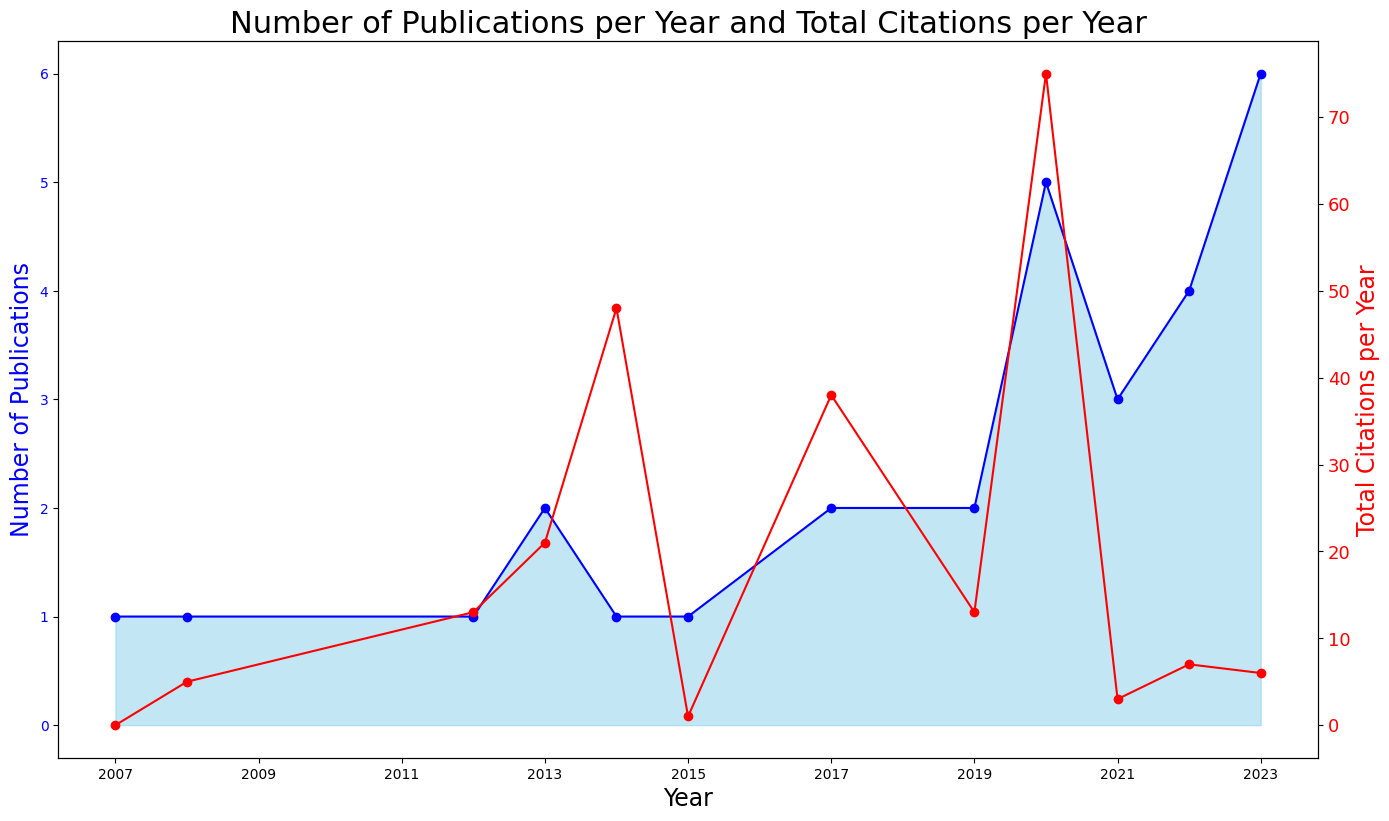

In [10]:

# Carregar os dados do arquivo Excel
file_path = 'data_papers.xlsx'
df = pd.read_excel(file_path)

# Filtrar colunas relevantes e garantir que os dados sejam numéricos
publications_and_citations = df[['PY', 'TC']]
publications_and_citations['PY'] = pd.to_numeric(publications_and_citations['PY'], errors='coerce')
publications_and_citations['TC'] = pd.to_numeric(publications_and_citations['TC'], errors='coerce')
publications_and_citations.dropna(inplace=True)

# Calcular o número de publicações e o total de citações por ano
publications_per_year = publications_and_citations.groupby('PY').size().reset_index(name='PublicationCount')
citations_per_year = publications_and_citations.groupby('PY')['TC'].sum().reset_index().rename(columns={'TC': 'TotalCitations'})

# Mesclar os dataframes
publications_and_citations = pd.merge(publications_per_year, citations_per_year, on='PY')

# Filtrar dados até 2023
publications_and_citations = publications_and_citations[publications_and_citations['PY'] <= 2023]

# Plotar os dados
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de área para o número de publicações
ax1.fill_between(publications_and_citations['PY'], publications_and_citations['PublicationCount'], color='skyblue', alpha=0.5)
ax1.plot(publications_and_citations['PY'], publications_and_citations['PublicationCount'], color='blue', marker='o', label='Publications')
ax1.set_xlabel('Year', fontsize=17)
ax1.set_ylabel('Number of Publications', color='blue',fontsize=17)
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo y secundário para o total de citações
ax2 = ax1.twinx()
ax2.plot(publications_and_citations['PY'], publications_and_citations['TotalCitations'], color='red', marker='o', label='Citations')
ax2.set_ylabel('Total Citations per Year', color='red', fontsize=17)
ax2.tick_params(axis='y', labelcolor='red')

# Configurar o eixo x com números inteiros
plt.xticks(range(int(publications_and_citations['PY'].min()), int(publications_and_citations['PY'].max()) + 1, 2), fontsize=13)
plt.yticks(fontsize=13)




fig.tight_layout()
plt.title('Number of Publications per Year and Total Citations per Year', fontsize=22)
plt.show()
